In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('hr_raw_data_v2.csv')

In [3]:
df.head()

,employee_number,gender,birth_year,age,marital_status,dist_home,job_title,department,departured,year_at_comp,standard_hours,remote,business_travel,over_time,job_level,stock_opt_level,traning_times_last_year,perf_rate,year_last_promotion,year_current_mngr,education_field,education_scale,annual_salary,monthly_income,daily_rate,perc_salary_hike,env_sat_rate,job_involvement,job_sat_rate,relationship_sat_rate,work_life_balance,num_comp_worked,tot_working_year
0,1,M,1972,51.0,Unknown,6,Research Director,Research & Development,No,20,Full Time,Yes,Unknown,No,5,0,5,3.0,15,15,Unknown,3,195370.00,16280.830000,2015.722222,13,1,3,3,3,3.0,7,NaN
1,2,M,1971,52.0,Unknown,1,Manager,Unknown,No,33,NaN,Yes,Unknown,Unknown,5,1,5,3.0,11,9,Life Sciences,4,199990.00,16125.406667,2063.388889,14,3,2,3,1,3.0,0,34.0
2,3,M,1981,42.0,Married,4,Manager,Research & Development,No,22,NaN,Yes,travel_rarely,No,5,0,3,3.0,11,15,Technical Degree,2,192320.00,15943.720000,1984.253968,11,3,3,4,4,NaN,1,22.0
3,4,F,1976,47.0,Married,2,Research Director,Research & Development,No,20,Full Time,No,travel_rarely,Unknown,4,2,2,3.0,5,6,Medical,4,171690.00,14307.500000,1771.404762,19,1,3,3,2,NaN,3,NaN
4,5,F,1977,46.0,Divorced,3,Sales Executive,Sales,No,19,NaN,No,Unknown,No,4,1,5,3.0,2,8,Technical Degree,3,153407.07,12783.920000,1582.771346,12,1,4,1,4,3.0,2,NaN


Text(0.5, 1.0, 'Correlation salary & gender')

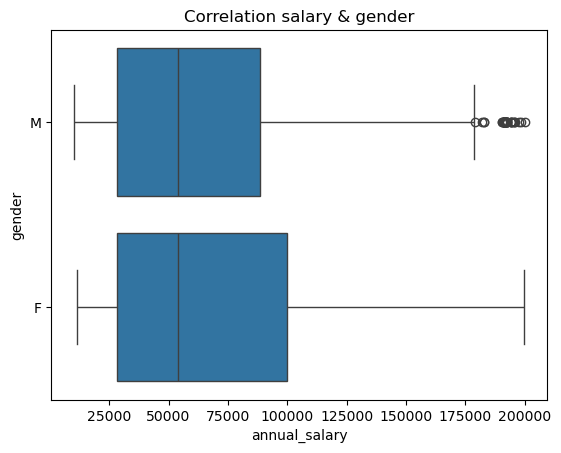

In [4]:
sns.boxplot(data=df, y='gender', x='annual_salary')
plt.title('Correlation salary & gender')

In [5]:
df['standard_hours'].mode()

0    Part Time
Name: standard_hours, dtype: object

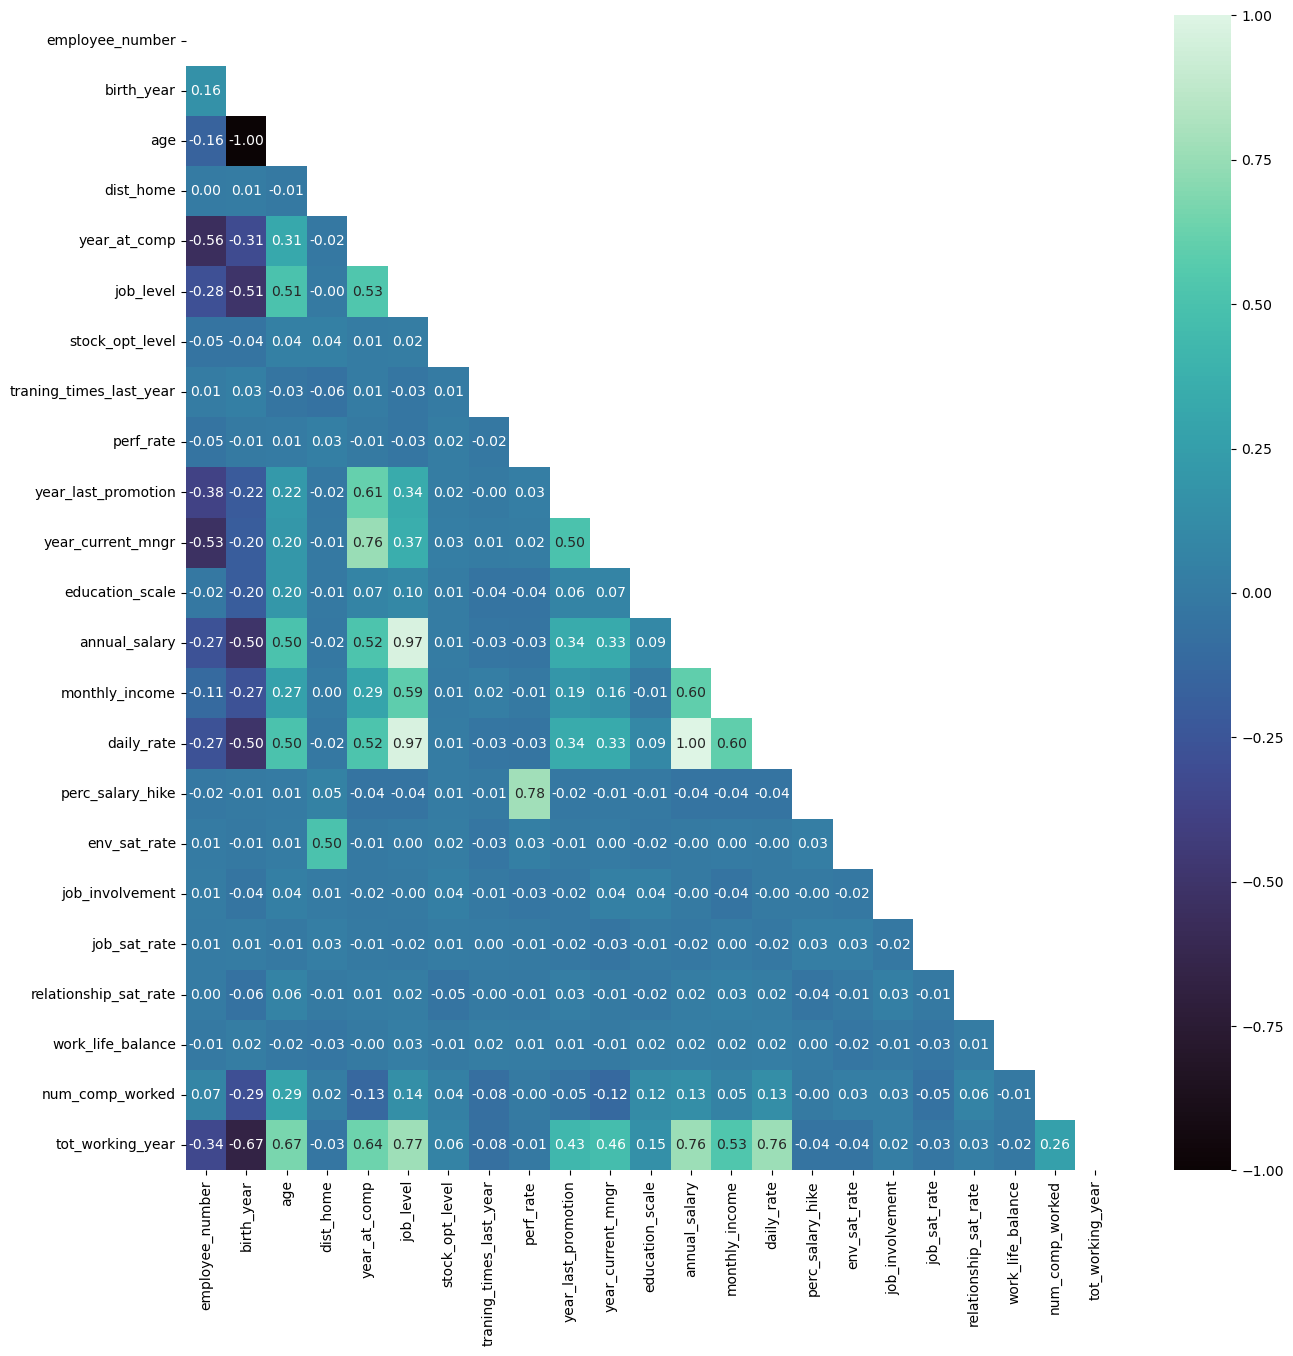

In [6]:
# GENERAL DATA ANALYSIS

numerics = df.select_dtypes(exclude = 'O').columns
df_corr = df[numerics].corr(method = 'pearson')


plt.figure(figsize = (15, 15))

mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

In [7]:
df.isnull().sum() / df.shape[0] * 100




employee_number             0.000000
gender                      0.000000
birth_year                  0.000000
age                         0.000000
marital_status              0.000000
dist_home                   0.000000
job_title                   0.000000
department                  0.000000
departured                  0.000000
year_at_comp                0.000000
standard_hours             20.941760
remote                      0.000000
business_travel             0.000000
over_time                   0.000000
job_level                   0.000000
stock_opt_level             0.000000
traning_times_last_year     0.000000
perf_rate                  12.081784
year_last_promotion         0.000000
year_current_mngr           0.000000
education_field             0.000000
education_scale             0.000000
annual_salary               0.000000
monthly_income              0.000000
daily_rate                  0.000000
perc_salary_hike            0.000000
env_sat_rate                0.000000
j

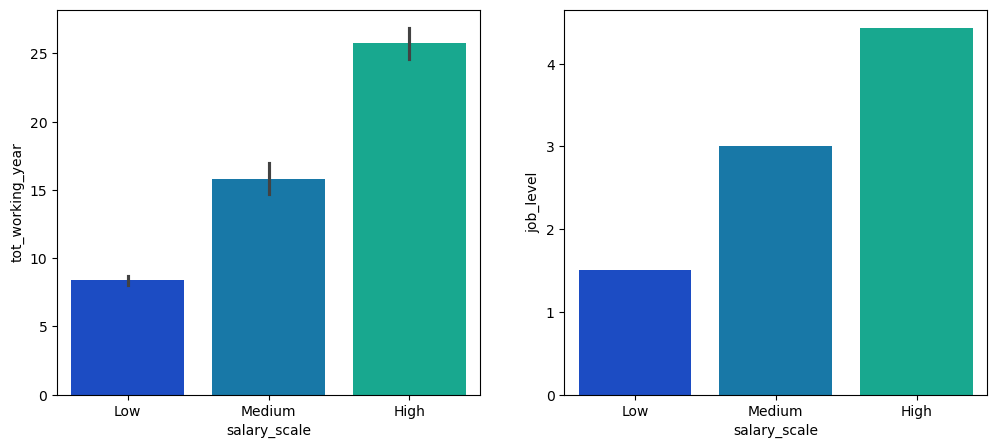

In [8]:
df['salary_scale'] = pd.cut(df['annual_salary'],bins = 3, labels= ['Low', 'Medium', 'High']) 


fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

sns.barplot(data=df, y='tot_working_year', 
            x='salary_scale',
            palette='winter',
            ax=axes[0])



sns.barplot(data=df, y='job_level', 
            x='salary_scale',
            palette='winter',
            ci=False)


plt.show();


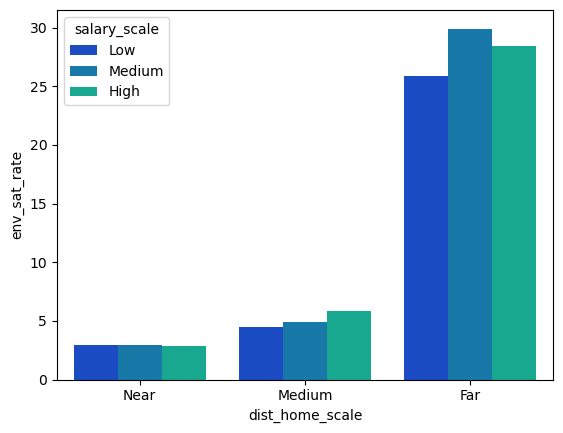

In [9]:
df['dist_home_scale'] = pd.cut(df['dist_home'],bins = 3, labels= ['Near', 'Medium', 'Far']) 


sns.barplot(data=df, y='env_sat_rate', 
            x='dist_home_scale',
            palette='winter',
            hue= 'salary_scale',
            ci=False);


